Загружаю все необходимые библиотеки

In [156]:
import pandas as pd
from pandas.plotting import register_matplotlib_converters
from pandas import read_csv, DataFrame
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf 
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
register_matplotlib_converters()

In [157]:
df = pd.read_csv('AAP_data.csv')
df.head(15)

,date,open,high,low,close,volume,Name
0,2013-02-08,78.34,79.720,78.0100,78.90,1298137,AAP
1,2013-02-11,78.65,78.910,77.2300,78.39,758016,AAP
2,2013-02-12,78.39,78.630,77.5132,78.60,876859,AAP
3,2013-02-13,78.90,79.130,77.8500,78.97,1038574,AAP
4,2013-02-14,78.66,79.720,78.5850,78.84,1005376,AAP
5,2013-02-15,78.83,79.180,77.9300,79.00,1247063,AAP
6,2013-02-19,79.12,81.440,78.5700,80.72,1730690,AAP
7,2013-02-20,80.42,80.940,79.3900,79.50,648693,AAP
8,2013-02-21,79.26,80.050,78.5600,79.06,915160,AAP
9,2013-02-22,79.20,79.460,78.6300,79.21,538188,AAP


Удаляю столбец **Name** за ненадобностью

In [158]:
df.drop('Name', axis = 1)

,date,open,high,low,close,volume
0,2013-02-08,78.34,79.7200,78.0100,78.90,1298137
1,2013-02-11,78.65,78.9100,77.2300,78.39,758016
2,2013-02-12,78.39,78.6300,77.5132,78.60,876859
3,2013-02-13,78.90,79.1300,77.8500,78.97,1038574
4,2013-02-14,78.66,79.7200,78.5850,78.84,1005376
...,...,...,...,...,...,...
1254,2018-02-01,116.24,118.8300,115.8300,117.29,760629
1255,2018-02-02,115.92,117.1800,113.1250,113.93,1092333
1256,2018-02-05,113.05,114.9700,109.8100,109.86,1281592
1257,2018-02-06,108.28,113.1100,106.7450,112.20,1240784




---



Проверяю статистическую значимость с помощью теста **Дики-Фуллера**

In [159]:
test = sm.tsa.adfuller(df.open)
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print('Pяд не стационарен')
else:
    print('Pяд стационарен')

adf:  -1.85814495839199
p-value:  0.35199978922049246
Critical values:  {'1%': -3.4355588184378574, '5%': -2.8638402312881497, '10%': -2.5679946684494275}
Pяд не стационарен




---



In [160]:
test = sm.tsa.adfuller(df.high)
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print('Pяд не стационарен')
else:
    print('Pяд стационарен')

adf:  -1.8177477608788513
p-value:  0.3716866995636672
Critical values:  {'1%': -3.4355588184378574, '5%': -2.8638402312881497, '10%': -2.5679946684494275}
Pяд не стационарен




---



In [161]:
test = sm.tsa.adfuller(df.low)
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print('Pяд не стационарен')
else:
    print('Pяд стационарен')

adf:  -1.9146139633028787
p-value:  0.3252177796238077
Critical values:  {'1%': -3.4355588184378574, '5%': -2.8638402312881497, '10%': -2.5679946684494275}
Pяд не стационарен




---



In [162]:
test = sm.tsa.adfuller(df.close)
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print('Pяд не стационарен')
else:
    print('Pяд стационарен')

adf:  -1.7863740362193679
p-value:  0.38724728162952976
Critical values:  {'1%': -3.4355796466416777, '5%': -2.863849421064024, '10%': -2.5679995625056926}
Pяд не стационарен




---



Нахожу нужный мне атрибут

In [163]:
test = sm.tsa.adfuller(df.volume)
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print('Pяд не стационарен')
else:
    print('Pяд стационарен')

adf:  -14.320405601866899
p-value:  1.1438424578271111e-26
Critical values:  {'1%': -3.4355671297788666, '5%': -2.8638438984080117, '10%': -2.5679966213893057}
Pяд стационарен


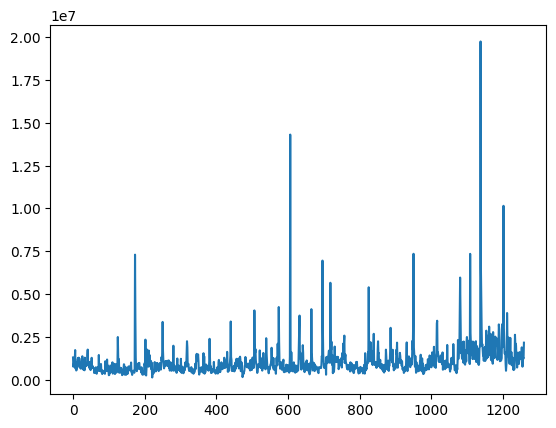

In [164]:
plt.plot(df.volume)

Создаю графики ACF и PACF

**ACF** - является (полной) функцией автокорреляции, которая дает нам значения автокорреляции любого ряда с его запаздывающими значениями.Проще говоря, он описывает, насколько хорошо текущая стоимость ряда связана с его прошлыми значениями. Временной ряд может иметь такие компоненты, как тренд, сезонность, циклический и остаточный. ACF учитывает все эти компоненты при поиске корреляций, поэтому это «полный график автокорреляции».

**PACF** - является частичной функцией автокорреляции. По сути, вместо того, чтобы находить корреляции настоящего с лагами, такими как ACF, он находит корреляцию остатков со следующим значением лага, следовательно, «частичным», а не «полным». Так мы удаляем уже найденные варианты, прежде чем мы найдем следующую корреляцию.

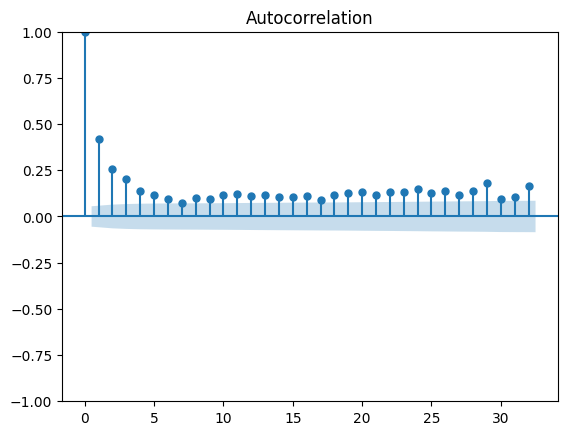

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


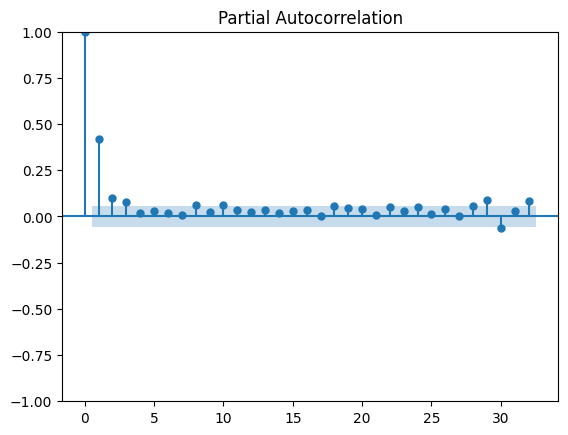

In [165]:
plot_acf(df.volume)
plt.show()

plot_pacf(df.volume)
plt.show()

Сосдаю новый датасет состоящий и атрибутов "date" и "volume". А так же делаю дату индексом, а так же чтобы питон не воспринимает дату как число, дату можно преобразовать в специальный объект datetime.

In [166]:
fd = pd.read_csv('AAP_data.csv', parse_dates= ['date'], index_col= ['date'])
fd.drop('Name', axis = 1, inplace = True)
fd.drop('open', axis = 1, inplace = True)
fd.drop('high', axis = 1, inplace = True)
fd.drop('low', axis = 1, inplace = True)
fd.drop('close', axis = 1, inplace = True)
fd

,volume
date,
2013-02-08,1298137
2013-02-11,758016
2013-02-12,876859
2013-02-13,1038574
2013-02-14,1005376
...,...
2018-02-01,760629
2018-02-02,1092333
2018-02-05,1281592


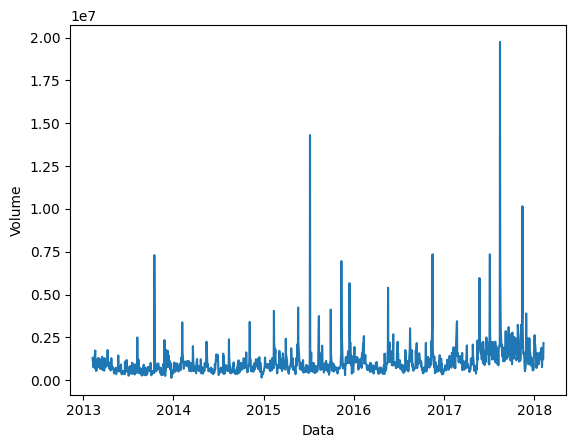

In [167]:
plt.xlabel('Data')
plt.ylabel('Volume')
plt.plot(fd)

Создаю модель **ARIMA**:

Модель ARIMA использует три целочисленных параметра: p, d и q.

**p** – порядок авторегрессии (AR). Его можно интерпретировать как выражение «элемент ряда будет близок к Х, если предыдущие р элементов были близки к Х».

**d** – порядок интегрирования (разностей исходного временного ряда). Можно понимать как «элемент будет близок по значению к предыдущим d элементам, если их разность минимальна».

**q** – порядок скользящего среднего (MA), который позволяет установить погрешность модели как линейную комбинацию наблюдавшихся ранее значений ошибок.



In [172]:
import warnings
import itertools
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")

p = range(0,10)
d = q = range(0,3)
pdq = list(itertools.product(p, d, q))
best_pdq = (0,0,0)
best_aic = np.inf
for params in pdq:
    model_test = sm.tsa.ARIMA(fd, order = (params))
    result_test = model_test.fit()
if result_test.aic < best_aic:
    best_pdq = params
    best_aic = result_test.aic
print(best_pdq, best_aic)

(9, 2, 2) 38173.22961167717


Нам выдали значениям p, d и q, при которых AIC будет минимальным. AIC оценивает, насколько хорошо модель подходит под данные. Чем меньше AIC – тем точнее модель.

Эти значения мы и будем использовать

In [173]:
from statsmodels.tsa.arima_model import ARIMA
src_data_model = fd['2016-05':]
model = sm.tsa.ARIMA(src_data_model, order=(9,2,2))
result = model.fit()

Проверка оптимальности

Больше всего нас интересует таблица коэффициентов. Столбец coef показывает влияние каждого параметра на временной ряд, а P>|z| — значимость. Чем ближе значение P>|z| к нулю, тем выше значимость.

In [174]:
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 volume   No. Observations:                  447
Model:                 ARIMA(9, 2, 2)   Log Likelihood               -6863.840
Date:                Tue, 25 Apr 2023   AIC                          13751.680
Time:                        04:25:55   BIC                          13800.856
Sample:                             0   HQIC                         13771.071
                                - 447                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3268      0.074      4.420      0.000       0.182       0.472
ar.L2          0.0403      0.152      0.266      0.790      -0.257       0.338
ar.L3          0.0189      0.105      0.181      0.857      -0.186       0.224
ar.L4         -0.0248      0.099     -0.252      0.801      -0.218       0.168
ar.L5         -0.0189      0.165     -0.115      0.909      -0.343       0.305
ar.L6         -0.0197      0.153     -0.128      0.898      -0.320       0.281
ar.L7         -0.0689      0.151     -0.455      0.649      -0.366       0.228
ar.L8          0.0417      0.096      0.435      0.664      -0.146       0.230
ar.L9         -0.0249      0.117     -0.212      0.832      -0.255       0.205
ma.L1         -1.9528      0.065    -30.220      0.000      -2.079      -1.826
ma.L2          0.9529      0.064     14.888      0.000       0.827       1.078
sigma2      1.881e+12   3.71e-13   5.07e+24      0.000    1.88e+12    1.88e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            294189.53
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               5.40   Skew:                             9.19
Prob(H) (two-sided):                  0.00   Kurtosis:                       127.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.52e+39. Standard errors may be unstable.
"""

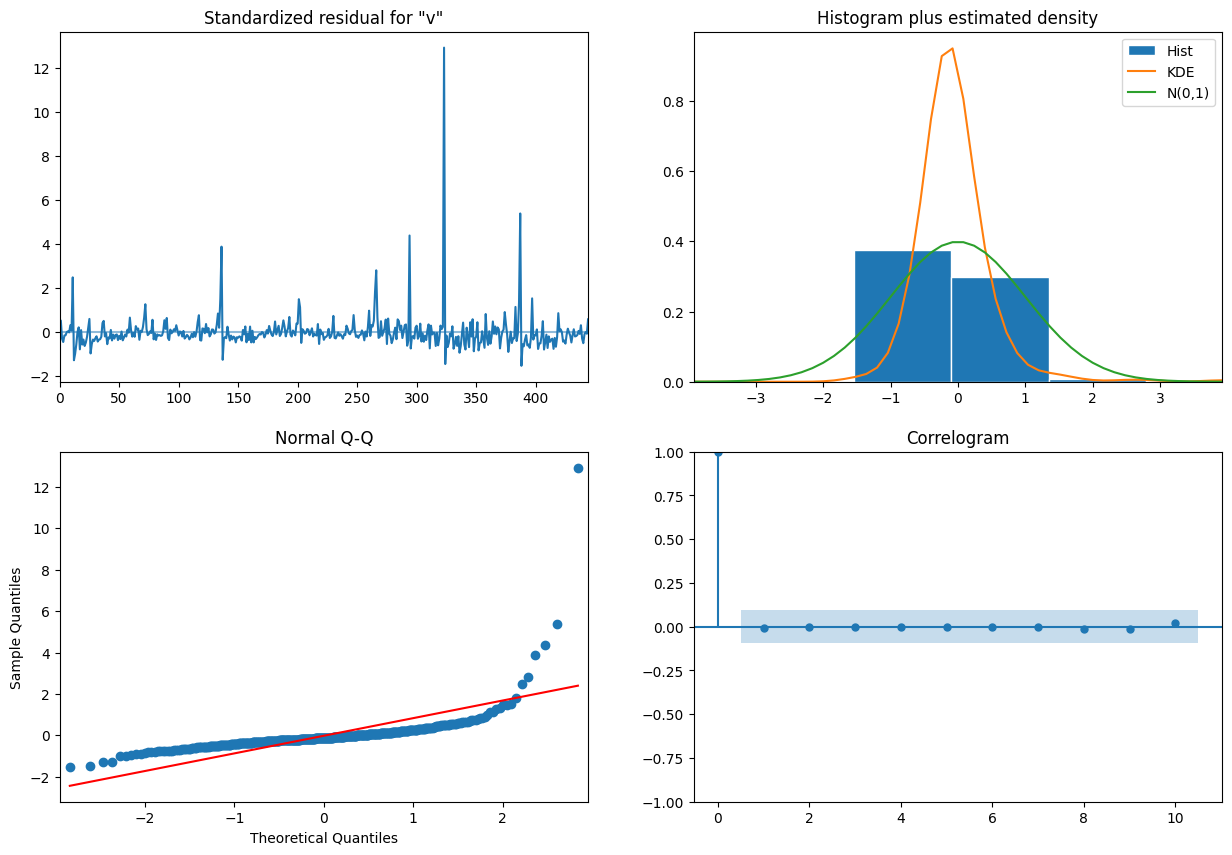

In [175]:
result.plot_diagnostics(figsize=(15, 10))
plt.show()

По этим графикам нужно убедиться, что остатки имеют нормальное распределение и близкую к нулю автокорреляцию. 

In [191]:
pred = result.get_prediction(start='2016-06', end='2018-02-07', dynamic=False)
pred_ci = pred.conf_int()

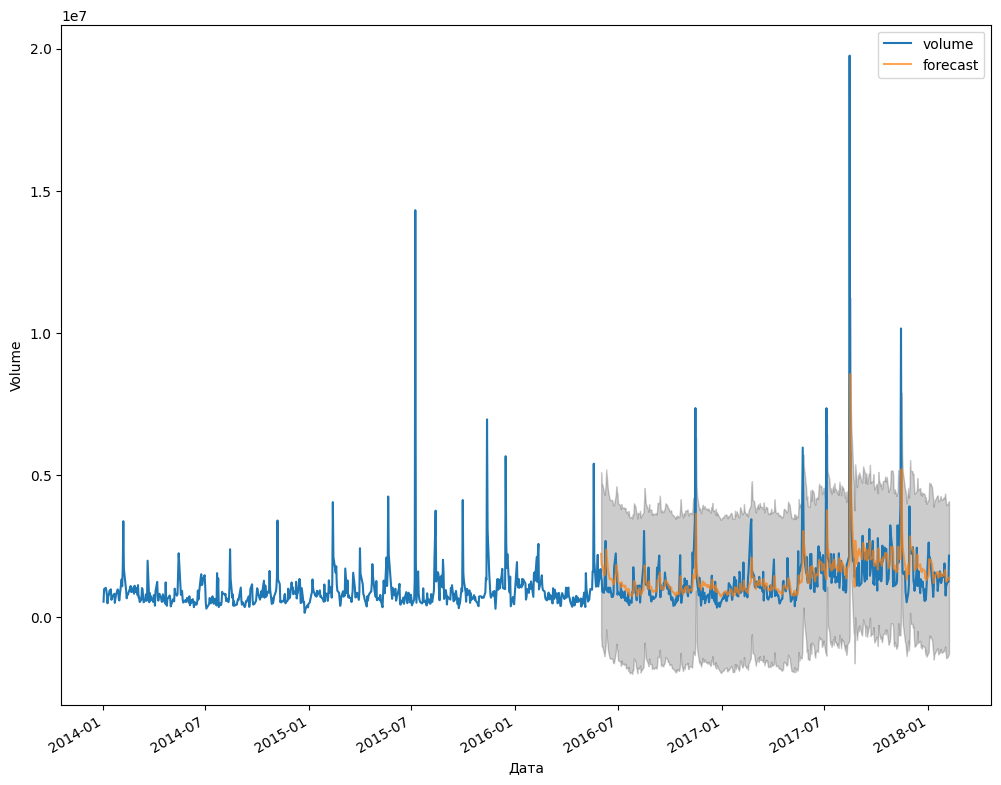

In [197]:
ax = fd['2014':].plot(label='observed', figsize=(12, 10))
pred.predicted_mean.plot(ax=ax, label='forecast', alpha=.7)
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Дата')
ax.set_ylabel('Volume')
plt.legend()
plt.show()

Как мы видим, реальные значения ряда в большинстве случаев попадают в пределы доверительного интервала прогноза ARIMA. 